In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
game_df = pd.read_csv('/Users/ronniesimmons/Downloads/vgsales.csv')
game_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [17]:
#Begin Data Cleaning
game_df.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [70]:
game_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [22]:
#Check for the null values
game_df[game_df['Year'].isnull() == True]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [23]:
game_df[game_df['Publisher'].isnull() == True]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


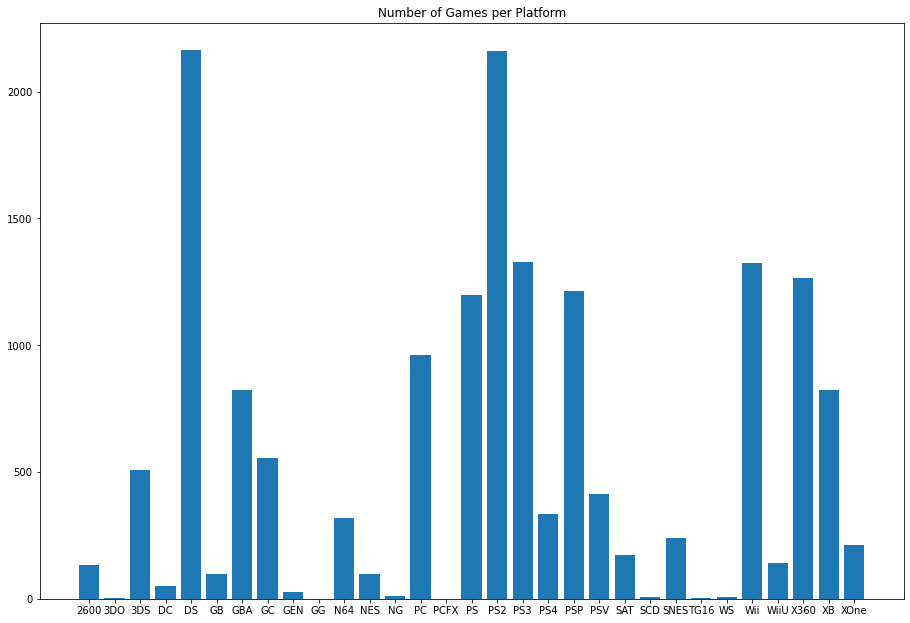

In [60]:
platform = game_df.groupby(['Platform']).size()
platform = dict(platform)
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(platform.keys(),platform.values())
plt.title('Number of Games per Platform')
plt.show()

In [44]:
platform_df = game_df.groupby(['Platform']).sum()
platform_df.drop(columns = ['Rank','Year'], inplace = True)
platform_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
2600,90.60,5.47,0.00,0.91,97.08
3DO,0.00,0.00,0.10,0.00,0.10
3DS,78.87,58.52,97.35,12.63,247.46
DC,5.43,1.69,8.56,0.27,15.97
DS,390.71,194.65,175.57,60.53,822.49
GB,114.32,47.82,85.12,8.20,255.45
GBA,187.54,75.25,47.33,7.73,318.50
GC,133.46,38.71,21.58,5.18,199.36
GEN,19.27,5.52,2.67,0.89,28.36


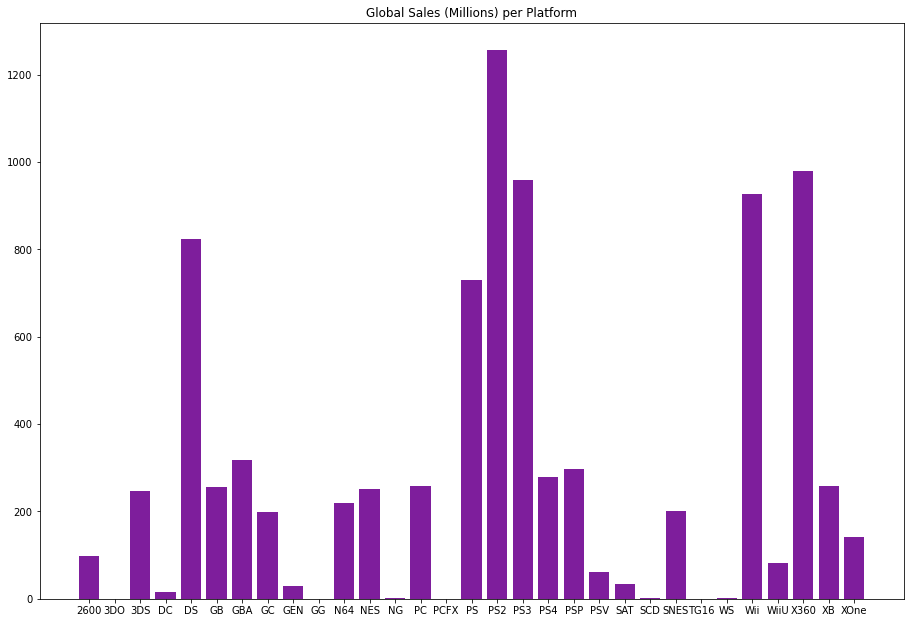

In [67]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(platform_df.index, platform_df['Global_Sales'], color = 'xkcd:purple')
plt.title('Global Sales (Millions) per Platform')
plt.show()

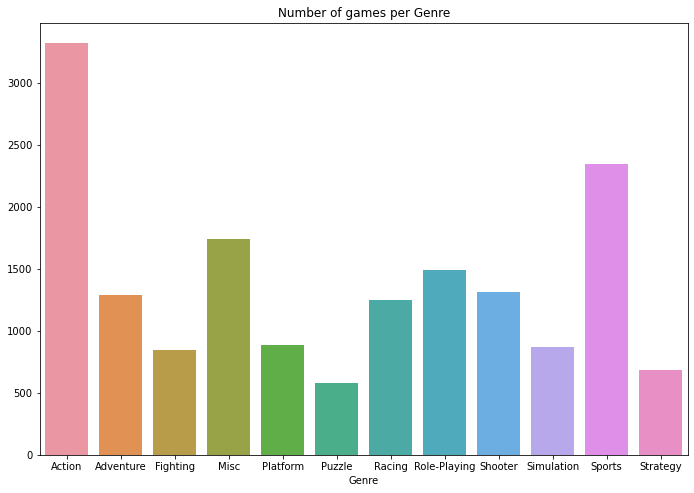

In [81]:
genre_i = game_df.groupby(['Genre']).size().index
genre = game_df.groupby(['Genre']).size()
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax = sns.barplot(x = genre_i, y = genre)
plt.title('Number of games per Genre')
ax

In [86]:
Genre_df = game_df.groupby(['Genre']).sum()
Genre_df.drop(columns = ['Rank','Year'], inplace = True)
Genre_df['Global_Sales']

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

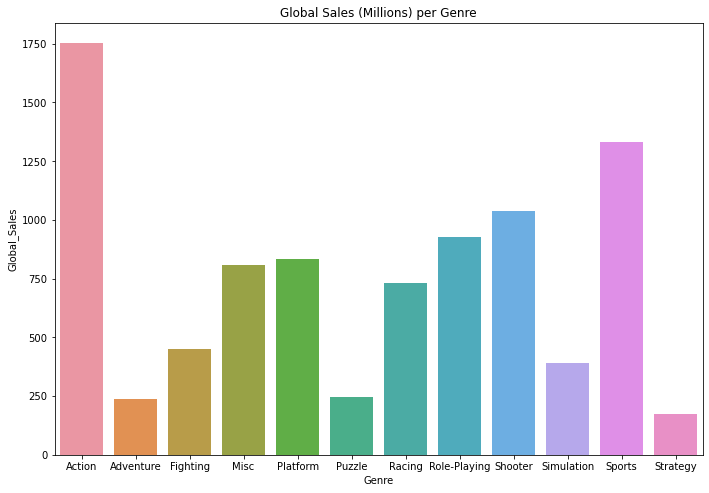

In [88]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax = sns.barplot(x = genre_i, y = Genre_df['Global_Sales'])
plt.title('Global Sales (Millions) per Genre')
ax 

In [113]:
# top_sellers = game_df[(game_df['Platform'].isin(['Wii','PS2','PS3','X360','DS']) == True) & (game_df['Genre'].isin(['Action','Sports','Shooter']) == True)]
# top_df = top_sellers.groupby(['Platform']).sum()
# top_df.drop(columns = ['Rank','Year'], inplace = True)
# top_df

In [110]:
top_df = top_sellers.groupby(['Platform','Genre']).sum()

Rank      Year  NA_Sales  EU_Sales  JP_Sales  \
Platform Genre                                                      
DS       Action   3218041  674809.0     66.46     27.04     12.74   
         Shooter   430815   84326.0      6.62      0.59      0.34   
         Sports   1527114  293173.0     15.68      7.89      5.70   
PS2      Action   2223430  691671.0    127.82     71.44     25.81   
         Shooter  1085052  316589.0     57.53     33.70      3.84   
         Sports   2501764  783675.0    134.12     69.96     24.74   
PS3      Action   2420789  750197.0    121.16    110.62     29.59   
         Shooter   754378  311612.0     81.88     75.14      8.81   
         Sports   1422690  422172.0     60.58     48.02      7.90   
Wii      Action   1695810  462103.0     70.28     33.04      4.92   
         Shooter   572182  122526.0     18.67      6.82      0.66   
         Sports   1904586  514307.0    151.77     94.99     18.25   
X360     Action   2014963  639254.0    141.39     76.81      2.77   
         Shooter  1220584  395942.0    174.22     76.59      3.10   
         Sports   1469319  432076.0     89.63     37.50      0.41   

                  Other_Sales  Global_Sales  
Platform Genre                               
DS       Action          9.14        115.56  
         Shooter         0.55          8.20  
         Sports          2.49         31.83  
PS2      Action         47.64        272.76  
         Shooter        13.42        108.57  
         Sports         44.66        273.41  
PS3      Action         46.51        307.88  
         Shooter        30.21        196.04  
         Sports         19.17        135.56  
Wii      Action         10.27        118.58  
         Shooter         2.55         28.77  
         Sports         27.06        292.06  
X360     Action         21.63        242.67  
         Shooter        24.53        278.55  
         Sports         11.46        139.12

In [132]:
#Begin EDA to find out the trends over time
game_df1 = game_df.copy()
game_df1.sort_values(by = ['Year'], inplace = True)
game_df1.groupby(['Year']).sum()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
1980.0,29826,10.59,0.67,0.00,0.12,11.38
1981.0,190488,33.40,1.96,0.00,0.32,35.77
1982.0,149186,26.92,1.65,0.00,0.31,28.86
1983.0,56759,7.76,0.80,8.10,0.14,16.79
1984.0,22911,33.28,2.10,14.27,0.70,50.36
1985.0,55505,33.73,4.74,14.56,0.92,53.94
1986.0,35986,12.50,2.84,19.81,1.93,37.07
1987.0,54701,8.46,1.41,11.63,0.20,21.74
1988.0,37181,23.87,6.59,15.76,0.99,47.22


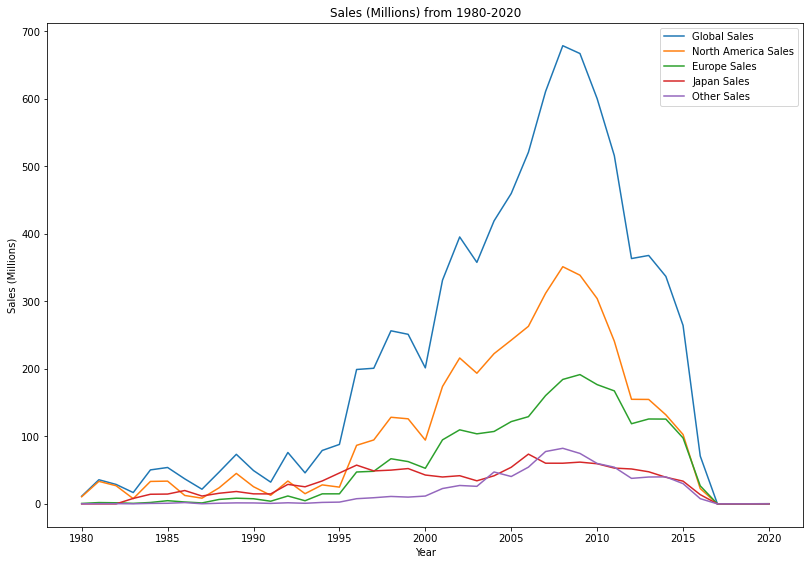

In [150]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.75,1.75])
ax = sns.lineplot(x = game_df1.groupby(['Year']).sum().index, y = game_df1.groupby(['Year']).sum()['Global_Sales'])
ax = sns.lineplot(x = game_df1.groupby(['Year']).sum().index, y = game_df1.groupby(['Year']).sum()['NA_Sales'])
ax = sns.lineplot(x = game_df1.groupby(['Year']).sum().index, y = game_df1.groupby(['Year']).sum()['EU_Sales'])
ax = sns.lineplot(x = game_df1.groupby(['Year']).sum().index, y = game_df1.groupby(['Year']).sum()['JP_Sales'])
ax = sns.lineplot(x = game_df1.groupby(['Year']).sum().index, y = game_df1.groupby(['Year']).sum()['Other_Sales'])
plt.ylabel('Sales (Millions)')
plt.title('Sales (Millions) from 1980-2020')
ax.legend(['Global Sales','North America Sales','Europe Sales','Japan Sales','Other Sales'])
plt.show()